In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [5]:
cd C:\Users\HP\Desktop\dataset 

C:\Users\HP\Desktop\dataset


In [7]:
df = pd.read_csv('dataset_1.txt', sep=',', header=None)
print('The dataset contains %d rows.' % len(df))
df.head()

The dataset contains 245576 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.19,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092,38.214,-0.90671,-0.43698,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.59,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021,37.482,-0.94272,-0.32132,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.17,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584,37.116,-0.92271,-0.21722,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.29,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514,35.285,-0.89070,-0.13626,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.30,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246,33.088,-0.89870,-0.10927,-0.48709,-63.566,39.017,-10.3590,1


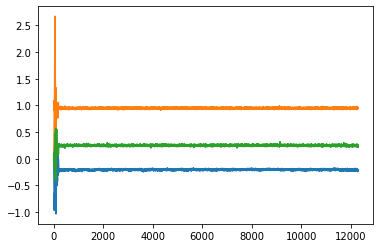

In [8]:
df_sitting = df[df[24] == 1].values
plt.plot(df_sitting[:, 0:3])
plt.show()

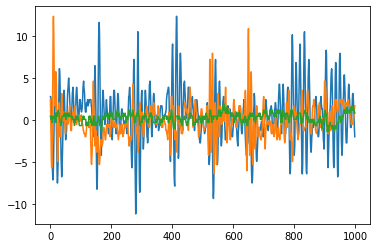

In [9]:
df_standing = df[df[24] == 3].values
plt.plot(df_standing[500:1500, 9:12])
plt.show()


In [10]:
df.tail()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
245571,-0.61087,1.8314,-1.3167,-96.115,24.468,426.15,0.120770,-0.46249,-0.835110,37.573,...,-44.3230,-25.3440,-66.8750,-0.86268,2.0883,-0.053413,69.719,41.9460,149.2900,13
245572,-0.61869,1.7753,-1.3494,-124.680,33.256,430.91,0.093282,-0.63212,-0.569760,-23.943,...,-25.6480,-8.1346,-41.2440,-0.80266,2.3659,-0.072949,60.931,33.1580,152.2200,13
245573,-0.63822,1.7072,-1.3820,-147.380,43.875,437.50,0.073648,-0.80982,-0.284290,-111.820,...,-10.6360,14.9340,-16.7110,-0.61457,2.5548,-0.053413,49.214,27.2990,147.8200,13
245574,-0.66948,1.6430,-1.4474,-167.520,54.127,444.82,-0.004887,-1.13700,-0.018936,-220.210,...,-1.8476,35.8050,5.6254,-0.25040,7.2623,0.872550,56.537,8.2589,137.5700,13
245575,-0.71247,1.5749,-1.4964,-183.630,62.549,451.78,-0.106980,-1.58120,0.278590,-328.590,...,2.9126,63.2680,34.5530,0.56199,3.4763,0.028634,110.730,-120.6300,2.8229,13


In [11]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,...,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000,245576.000000
mean,-0.706102,0.505347,0.301947,4.358393,4.522813,3.075138,-0.078600,-0.925506,0.014685,0.036598,...,0.766561,-0.457613,0.446099,-1.131541,0.133394,0.057575,-9.264897,13.847820,-4.762632,7.385355
std,0.571145,0.478714,0.420150,99.039837,47.553402,97.016271,0.169151,0.630045,0.347163,59.113632,...,49.273944,105.676986,39.320917,0.833355,1.044291,0.462337,45.317707,53.848062,163.571276,3.456699
min,-6.499500,-3.459300,-2.325500,-661.480000,-272.490000,-565.060000,-1.878000,-8.414700,-2.612200,-662.900000,...,-624.330000,-669.430000,-419.490000,-8.086100,-7.974300,-7.519700,-532.260000,-696.240000,-764.660000,1.000000
25%,-0.993810,0.256230,0.059693,-19.220000,-9.219300,-22.403000,-0.154100,-1.031900,-0.203880,-10.120500,...,-13.931000,-13.261000,-9.753500,-1.422900,-0.113130,-0.053413,-12.302000,-3.458500,-22.076000,4.000000
50%,-0.653850,0.428580,0.243480,0.919220,-0.065115,0.298940,-0.095203,-0.971370,-0.002854,-0.142030,...,0.715580,-0.078928,0.132940,-1.018800,0.010245,0.098960,-7.908300,6.794200,-4.500500,7.000000
75%,-0.481920,0.717160,0.713170,26.551000,10.554000,18.973000,-0.004887,-0.825980,0.186110,10.111000,...,16.095000,11.272000,6.357800,-0.846680,0.222290,0.227890,-3.514300,24.370000,37.975000,11.000000
max,2.401800,5.118100,2.228400,736.550000,348.160000,571.880000,1.770000,4.565700,3.720200,733.660000,...,731.580000,733.720000,604.670000,8.165600,7.705600,8.088800,374.370000,528.210000,642.880000,13.000000


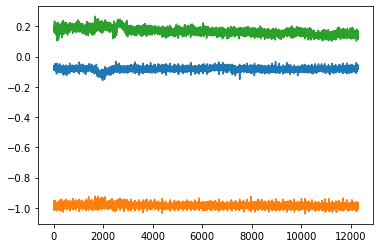

In [12]:
df_standing = df[df[24] == 3].values
plt.plot(df_standing[:, 6:9])
plt.show()


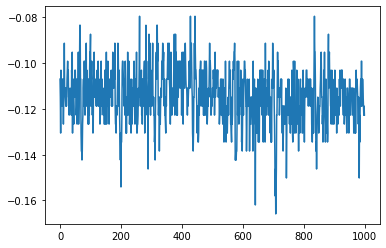

In [13]:
plt.plot(df_sitting[500:1500, 6])


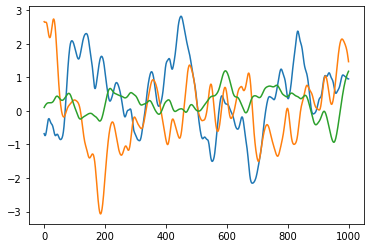

In [15]:
def noise_removing():
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    df_sitting = df[df[24] == 3].values
    for i in range(9,12):
            df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
    plt.plot(df_sitting[500:1500, 9:12])
    plt.show()
noise_removing()

In [17]:
def feature_engineering_example():
    training = np.empty(shape=(0, 10))
    testing = np.empty(shape=(0, 10))
    # deal with each dataset file
    for i in range(19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]

            # data segementation: for time series data, we need to segment the whole time series, and then extract features from each period of time
            # to represent the raw data. In this example code, we define each period of time contains 1000 data points. Each period of time contains 
            # different data points. You may consider overlap segmentation, which means consecutive two segmentation share a part of data points, to 
            # get more feature samples.
            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1

            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]
                # in this example code, only three accelerometer data in wrist sensor is used to extract three simple features: min, max, and mean value in
                # a period of time. Finally we get 9 features and 1 label to construct feature dataset. You may consider all sensors' data and extract more

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
    print(feature_sample)
feature_engineering_example()

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
[[ 0.35180315  0.42419793  0.40164351  0.3651938   0.77098079  0.55005055
  -1.63947638 -1.24465921 -1.44379076 13.        ]]
